## Linear Regression Analysis on Housing Dataset

### 1. Import Required Libraries

In [19]:
# Essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Statistical libraries
import scipy.stats as stats

# Setting plot style and configurations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [20]:
# Create images directory for saving visualizations
import os

images_dir = 'images'
if not os.path.exists(images_dir):
    os.makedirs(images_dir)
    print("📁 Created 'images' directory for saving visualizations")
else:
    print("📁 'images' directory already exists")

print("💾 All visualizations will be saved as high-resolution PNG files")

📁 'images' directory already exists
💾 All visualizations will be saved as high-resolution PNG files


### 2. Load and Explore Dataset

In [21]:
# Load the housing dataset
df = pd.read_csv('Housing.csv')

print("📊 Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Display first few rows
print("\n🔍 First 5 rows of the dataset:")
df.head()

📊 Dataset loaded successfully!
Dataset shape: (545, 13)
Number of rows: 545
Number of columns: 13

🔍 First 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [22]:
# Dataset information and data types
print("📋 Dataset Information:")
print(df.info())

print("\n🔢 Data Types:")
print(df.dtypes)

print("\n📊 Descriptive Statistics:")
df.describe()

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

🔢 Data Types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
sto

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [23]:
# Check for missing values
print("❓ Missing Values Analysis:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ No missing values found in the dataset!")

print("\n📈 Unique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].dtype == 'object':
        print(f"  Values: {df[col].unique()}")
    print()

❓ Missing Values Analysis:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
✅ No missing values found in the dataset!

📈 Unique Values in Each Column:
price: 219 unique values

area: 284 unique values

bedrooms: 6 unique values

bathrooms: 4 unique values

stories: 4 unique values

mainroad: 2 unique values
  Values: ['yes' 'no']

guestroom: 2 unique values
  Values: ['no' 'yes']

basement: 2 unique values
  Values: ['no' 'yes']

hotwaterheating: 2 unique values
  Values: ['no' 'yes']

airconditioning: 2 unique values
  Values: ['yes' 'no']

parking: 4 unique values

prefarea: 2 unique values
  Values: ['yes' 'no']

furnishingstatus: 3 unique values
  Values: ['furnished' 'semi-furnished' 'unfurnished']



### 3. Data Preprocessing and Feature Engineering

In [24]:
# Create a copy of the original dataset for preprocessing
df_processed = df.copy()

# Identify categorical columns
categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
print(f"🏷️ Categorical columns: {categorical_columns}")

# Binary encoding for yes/no columns
binary_columns = [col for col in categorical_columns if set(df_processed[col].unique()) == {'yes', 'no'}]
print(f"📍 Binary columns (yes/no): {binary_columns}")

# Encode binary columns (yes=1, no=0)
for col in binary_columns:
    df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

# Label encoding for furnishingstatus
le = LabelEncoder()
df_processed['furnishingstatus'] = le.fit_transform(df_processed['furnishingstatus'])

print("\n✅ Categorical encoding completed!")
print("Furnishing status encoding:", dict(zip(le.classes_, le.transform(le.classes_))))

# Display the processed data types
print("\n🔢 New data types after encoding:")
print(df_processed.dtypes)

🏷️ Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
📍 Binary columns (yes/no): ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

✅ Categorical encoding completed!
Furnishing status encoding: {'furnished': np.int64(0), 'semi-furnished': np.int64(1), 'unfurnished': np.int64(2)}

🔢 New data types after encoding:
price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object


In [25]:
# Outlier detection using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

# Check for outliers in numerical columns
numerical_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()
print("🔍 Outlier Detection (using IQR method):")
print("-" * 50)

for col in numerical_columns:
    outlier_count = detect_outliers(df_processed, col)
    percentage = (outlier_count / len(df_processed)) * 100
    print(f"{col}: {outlier_count} outliers ({percentage:.2f}%)")

# Display processed dataset shape
print(f"\n📊 Processed dataset shape: {df_processed.shape}")
df_processed.head()

🔍 Outlier Detection (using IQR method):
--------------------------------------------------
price: 15 outliers (2.75%)
area: 12 outliers (2.20%)
bedrooms: 12 outliers (2.20%)
bathrooms: 1 outliers (0.18%)
stories: 41 outliers (7.52%)
mainroad: 77 outliers (14.13%)
guestroom: 97 outliers (17.80%)
basement: 0 outliers (0.00%)
hotwaterheating: 25 outliers (4.59%)
airconditioning: 0 outliers (0.00%)
parking: 12 outliers (2.20%)
prefarea: 128 outliers (23.49%)
furnishingstatus: 0 outliers (0.00%)

📊 Processed dataset shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


### 4. Exploratory Data Analysis and Visualization

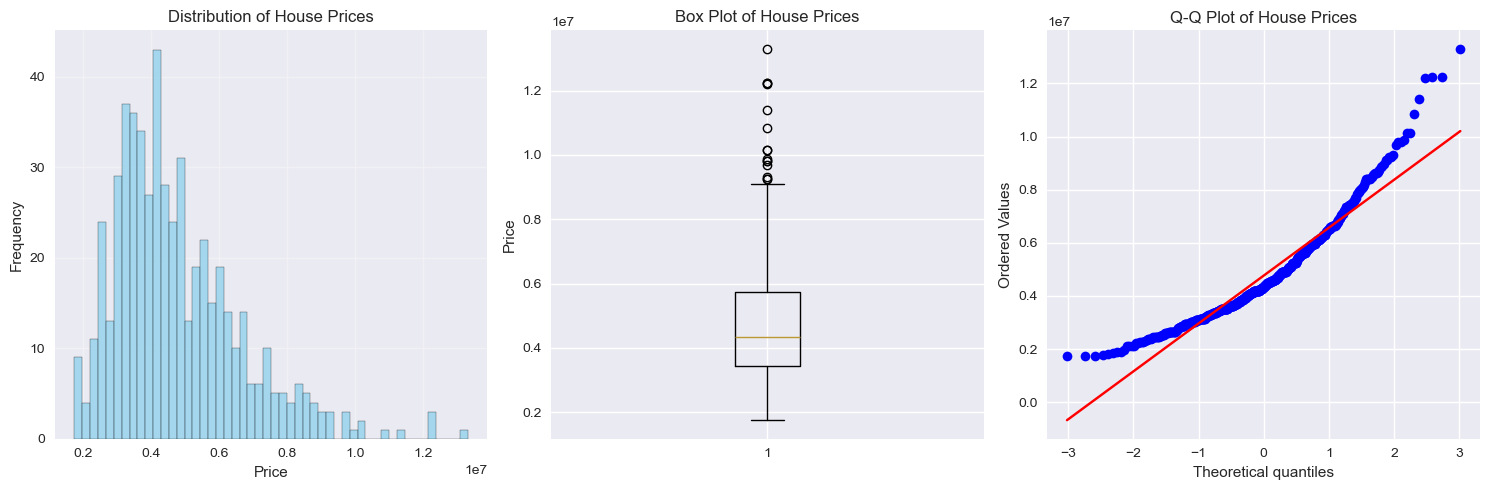

💰 House Price Statistics:
Mean price: ₹4,766,729.25
Median price: ₹4,340,000.00
Min price: ₹1,750,000.00
Max price: ₹13,300,000.00
Standard deviation: ₹1,870,439.62


In [26]:
# Target variable (price) distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_processed['price'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.boxplot(df_processed['price'])
plt.title('Box Plot of House Prices')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
stats.probplot(df_processed['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot of House Prices')

plt.tight_layout()
plt.savefig('images/01_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Price statistics
print("💰 House Price Statistics:")
print(f"Mean price: ₹{df_processed['price'].mean():,.2f}")
print(f"Median price: ₹{df_processed['price'].median():,.2f}")
print(f"Min price: ₹{df_processed['price'].min():,.2f}")
print(f"Max price: ₹{df_processed['price'].max():,.2f}")
print(f"Standard deviation: ₹{df_processed['price'].std():,.2f}")

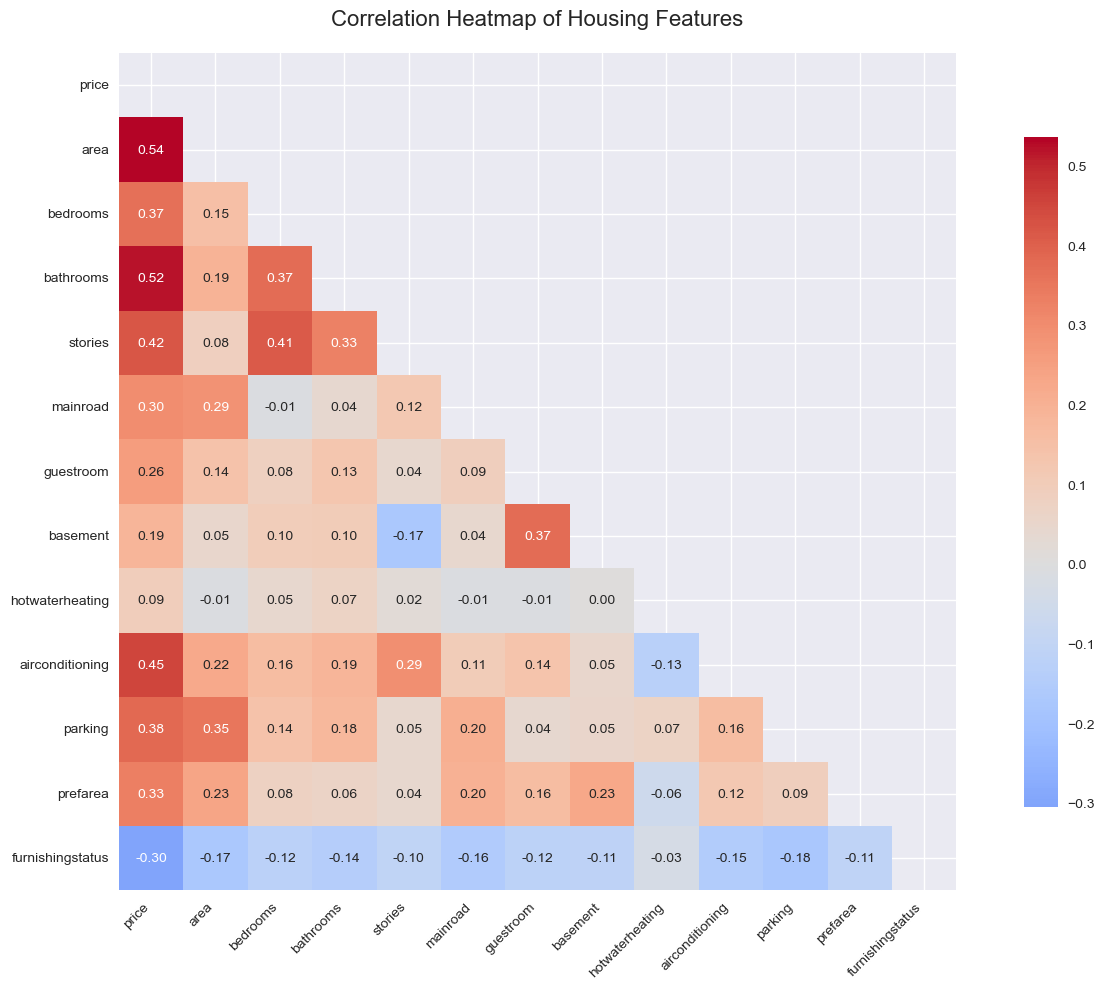

🎯 Features most correlated with price:
price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
mainroad            0.296898
Name: price, dtype: float64


In [27]:
# Correlation matrix and heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df_processed.corr()

# Create heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Housing Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('images/02_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Features most correlated with price
price_correlations = correlation_matrix['price'].abs().sort_values(ascending=False)
print("🎯 Features most correlated with price:")
print(price_correlations.head(10))

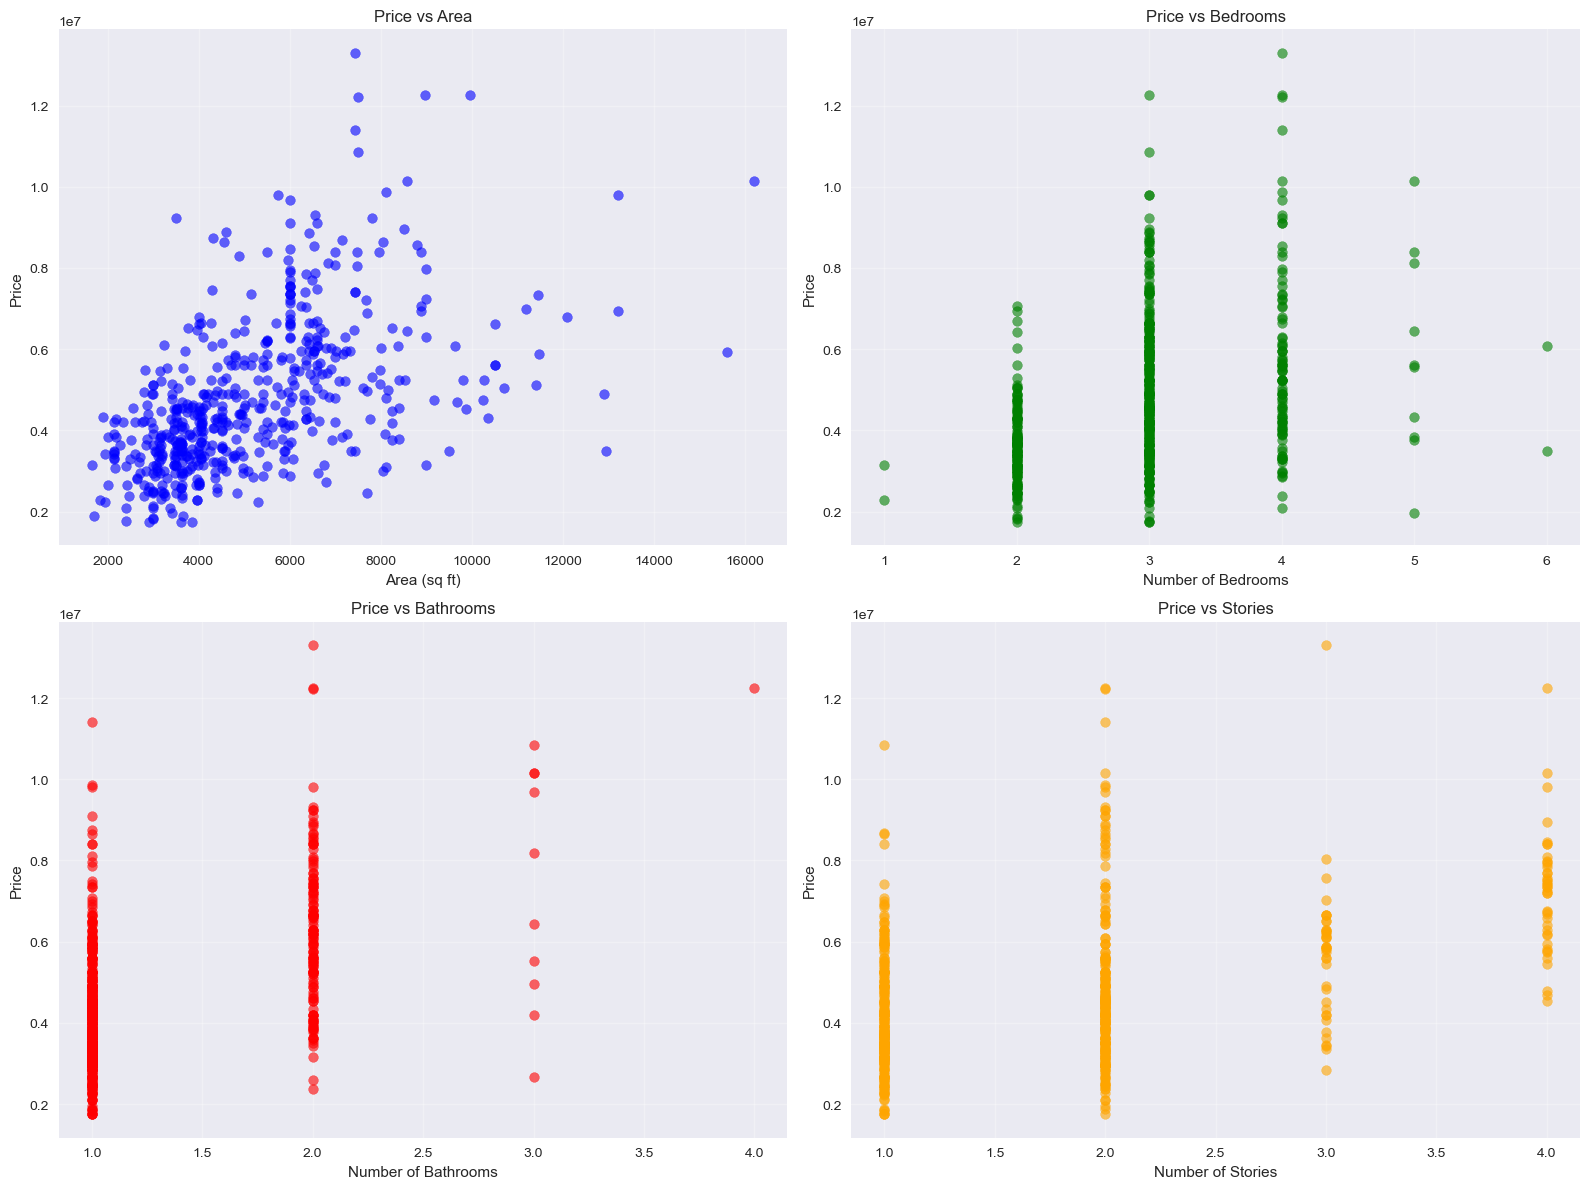

In [28]:
# Scatter plots for key relationships with price
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Area vs Price
axes[0, 0].scatter(df_processed['area'], df_processed['price'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Area (sq ft)')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Price vs Area')
axes[0, 0].grid(True, alpha=0.3)

# Bedrooms vs Price
axes[0, 1].scatter(df_processed['bedrooms'], df_processed['price'], alpha=0.6, color='green')
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Price vs Bedrooms')
axes[0, 1].grid(True, alpha=0.3)

# Bathrooms vs Price
axes[1, 0].scatter(df_processed['bathrooms'], df_processed['price'], alpha=0.6, color='red')
axes[1, 0].set_xlabel('Number of Bathrooms')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Price vs Bathrooms')
axes[1, 0].grid(True, alpha=0.3)

# Stories vs Price
axes[1, 1].scatter(df_processed['stories'], df_processed['price'], alpha=0.6, color='orange')
axes[1, 1].set_xlabel('Number of Stories')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Price vs Stories')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/03_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

### 5. Data Splitting and Preparation

In [29]:
# Prepare features and target variable
X = df_processed.drop('price', axis=1)  # Features
y = df_processed['price']               # Target variable

print("🎯 Target variable (y): price")
print("📊 Features (X):", X.columns.tolist())

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\n📈 Data split completed!")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(df_processed)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(df_processed)*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")

# Display feature names and their types
print(f"\n🏷️ Feature Information:")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col:<20} - {X[col].dtype}")

🎯 Target variable (y): price
📊 Features (X): ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

📈 Data split completed!
Training set size: 436 samples (80.0%)
Testing set size: 109 samples (20.0%)
Number of features: 12

🏷️ Feature Information:
 1. area                 - int64
 2. bedrooms             - int64
 3. bathrooms            - int64
 4. stories              - int64
 5. mainroad             - int64
 6. guestroom            - int64
 7. basement             - int64
 8. hotwaterheating      - int64
 9. airconditioning      - int64
10. parking              - int64
11. prefarea             - int64
12. furnishingstatus     - int64


### 6. Simple Linear Regression Implementation

In [30]:
# Simple Linear Regression using 'area' as the single feature
# Area has the highest correlation with price

# Prepare data for simple linear regression
X_simple_train = X_train[['area']].values
X_simple_test = X_test[['area']].values

# Initialize and fit the simple linear regression model
simple_lr = LinearRegression()
simple_lr.fit(X_simple_train, y_train)

# Make predictions
y_simple_train_pred = simple_lr.predict(X_simple_train)
y_simple_test_pred = simple_lr.predict(X_simple_test)

print("🔍 Simple Linear Regression Model (Price vs Area)")
print("=" * 50)
print(f"Coefficient (slope): {simple_lr.coef_[0]:.2f}")
print(f"Intercept: {simple_lr.intercept_:.2f}")
print(f"\nRegression equation: Price = {simple_lr.intercept_:.2f} + {simple_lr.coef_[0]:.2f} × Area")

# Interpretation
print(f"\n📊 Interpretation:")
print(f"• For every 1 sq ft increase in area, the price increases by ₹{simple_lr.coef_[0]:.2f}")
print(f"• Base price (when area = 0) would be ₹{simple_lr.intercept_:.2f}")

🔍 Simple Linear Regression Model (Price vs Area)
Coefficient (slope): 425.73
Intercept: 2512254.26

Regression equation: Price = 2512254.26 + 425.73 × Area

📊 Interpretation:
• For every 1 sq ft increase in area, the price increases by ₹425.73
• Base price (when area = 0) would be ₹2512254.26


### 7. Multiple Linear Regression Implementation

In [31]:
# Multiple Linear Regression using all features
# Initialize and fit the multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)

# Make predictions
y_multiple_train_pred = multiple_lr.predict(X_train)
y_multiple_test_pred = multiple_lr.predict(X_test)

print("🔍 Multiple Linear Regression Model")
print("=" * 50)
print(f"Intercept: {multiple_lr.intercept_:.2f}")
print(f"\nCoefficients:")

# Display coefficients for each feature
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': multiple_lr.coef_,
    'Abs_Coefficient': np.abs(multiple_lr.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(feature_importance.to_string(index=False))

print(f"\n📊 Top 5 Most Influential Features (by absolute coefficient value):")
for i, (_, row) in enumerate(feature_importance.head().iterrows(), 1):
    impact = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"{i}. {row['Feature']}: {impact} price by ₹{abs(row['Coefficient']):.2f} per unit")

🔍 Multiple Linear Regression Model
Intercept: 293083.07

Coefficients:
         Feature   Coefficient  Abs_Coefficient
       bathrooms  1.097117e+06     1.097117e+06
 airconditioning  7.855506e+05     7.855506e+05
 hotwaterheating  6.878813e+05     6.878813e+05
        prefarea  6.299017e+05     6.299017e+05
         stories  4.062232e+05     4.062232e+05
        basement  3.931598e+05     3.931598e+05
        mainroad  3.668242e+05     3.668242e+05
       guestroom  2.331468e+05     2.331468e+05
         parking  2.257565e+05     2.257565e+05
furnishingstatus -2.103971e+05     2.103971e+05
        bedrooms  7.857449e+04     7.857449e+04
            area  2.358488e+02     2.358488e+02

📊 Top 5 Most Influential Features (by absolute coefficient value):
1. bathrooms: increases price by ₹1097117.27 per unit
2. airconditioning: increases price by ₹785550.58 per unit
3. hotwaterheating: increases price by ₹687881.31 per unit
4. prefarea: increases price by ₹629901.66 per unit
5. stories: i

### 8. Model Evaluation and Metrics

In [32]:
# Function to calculate and display evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📊 {model_name} Performance Metrics:")
    print("-" * 50)
    print(f"Mean Absolute Error (MAE):  ₹{mae:,.2f}")
    print(f"Mean Squared Error (MSE):   ₹{mse:,.2f}")
    print(f"Root Mean Squared Error (RMSE): ₹{rmse:,.2f}")
    print(f"R-squared (R²) Score:       {r2:.4f} ({r2*100:.2f}%)")
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Evaluate Simple Linear Regression
print("🔍 SIMPLE LINEAR REGRESSION EVALUATION")
print("=" * 60)
simple_train_metrics = evaluate_model(y_train, y_simple_train_pred, "Training Set")
simple_test_metrics = evaluate_model(y_test, y_simple_test_pred, "Testing Set")

# Evaluate Multiple Linear Regression
print("\n\n🔍 MULTIPLE LINEAR REGRESSION EVALUATION")
print("=" * 60)
multiple_train_metrics = evaluate_model(y_train, y_multiple_train_pred, "Training Set")
multiple_test_metrics = evaluate_model(y_test, y_multiple_test_pred, "Testing Set")

🔍 SIMPLE LINEAR REGRESSION EVALUATION

📊 Training Set Performance Metrics:
--------------------------------------------------
Mean Absolute Error (MAE):  ₹1,092,585.59
Mean Squared Error (MSE):   ₹2,204,738,681,379.34
Root Mean Squared Error (RMSE): ₹1,484,836.25
R-squared (R²) Score:       0.2850 (28.50%)

📊 Testing Set Performance Metrics:
--------------------------------------------------
Mean Absolute Error (MAE):  ₹1,474,748.13
Mean Squared Error (MSE):   ₹3,675,286,604,768.19
Root Mean Squared Error (RMSE): ₹1,917,103.70
R-squared (R²) Score:       0.2729 (27.29%)


🔍 MULTIPLE LINEAR REGRESSION EVALUATION

📊 Training Set Performance Metrics:
--------------------------------------------------
Mean Absolute Error (MAE):  ₹718,146.60
Mean Squared Error (MSE):   ₹969,902,818,698.31
Root Mean Squared Error (RMSE): ₹984,836.44
R-squared (R²) Score:       0.6854 (68.54%)

📊 Testing Set Performance Metrics:
--------------------------------------------------
Mean Absolute Error (MAE):  ₹9

In [33]:
# Model Comparison Summary
comparison_df = pd.DataFrame({
    'Model': ['Simple LR (Train)', 'Simple LR (Test)', 'Multiple LR (Train)', 'Multiple LR (Test)'],
    'MAE': [simple_train_metrics['MAE'], simple_test_metrics['MAE'], 
            multiple_train_metrics['MAE'], multiple_test_metrics['MAE']],
    'RMSE': [simple_train_metrics['RMSE'], simple_test_metrics['RMSE'], 
             multiple_train_metrics['RMSE'], multiple_test_metrics['RMSE']],
    'R²': [simple_train_metrics['R2'], simple_test_metrics['R2'], 
           multiple_train_metrics['R2'], multiple_test_metrics['R2']]
})

print("\n\n📈 MODEL COMPARISON SUMMARY")
print("=" * 80)
print(comparison_df.to_string(index=False, float_format='%.2f'))

# Performance Analysis
print(f"\n🎯 KEY INSIGHTS:")
print(f"• Simple Linear Regression R²: {simple_test_metrics['R2']:.4f}")
print(f"• Multiple Linear Regression R²: {multiple_test_metrics['R2']:.4f}")
print(f"• Improvement with Multiple LR: {((multiple_test_metrics['R2'] - simple_test_metrics['R2']) * 100):.2f} percentage points")

if multiple_test_metrics['R2'] > simple_test_metrics['R2']:
    print("✅ Multiple Linear Regression performs better than Simple Linear Regression")
else:
    print("⚠️ Simple Linear Regression performs better (possible overfitting in Multiple LR)")



📈 MODEL COMPARISON SUMMARY
              Model        MAE       RMSE   R²
  Simple LR (Train) 1092585.59 1484836.25 0.28
   Simple LR (Test) 1474748.13 1917103.70 0.27
Multiple LR (Train)  718146.60  984836.44 0.69
 Multiple LR (Test)  979679.69 1331071.42 0.65

🎯 KEY INSIGHTS:
• Simple Linear Regression R²: 0.2729
• Multiple Linear Regression R²: 0.6495
• Improvement with Multiple LR: 37.66 percentage points
✅ Multiple Linear Regression performs better than Simple Linear Regression


### 9. Visualization of Results

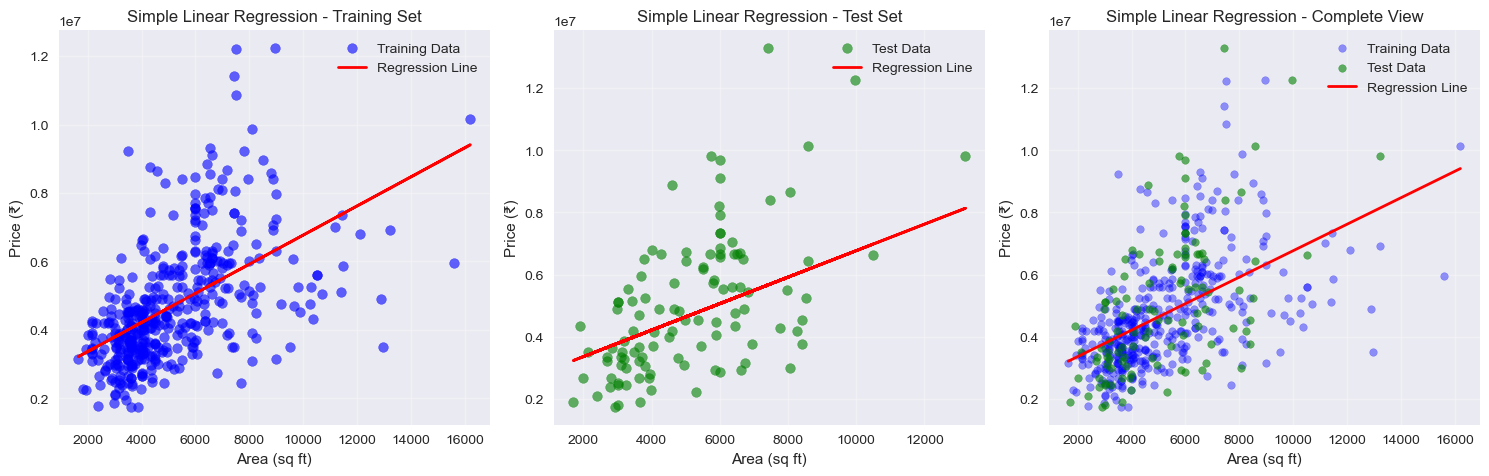

In [34]:
# Regression Line Visualization for Simple Linear Regression
plt.figure(figsize=(15, 5))

# Plot 1: Training data with regression line
plt.subplot(1, 3, 1)
plt.scatter(X_train['area'], y_train, alpha=0.6, color='blue', label='Training Data')
plt.plot(X_train['area'], y_simple_train_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (₹)')
plt.title('Simple Linear Regression - Training Set')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Test data with regression line
plt.subplot(1, 3, 2)
plt.scatter(X_test['area'], y_test, alpha=0.6, color='green', label='Test Data')
plt.plot(X_test['area'], y_simple_test_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (₹)')
plt.title('Simple Linear Regression - Test Set')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Combined view
plt.subplot(1, 3, 3)
plt.scatter(X_train['area'], y_train, alpha=0.4, color='blue', label='Training Data', s=30)
plt.scatter(X_test['area'], y_test, alpha=0.6, color='green', label='Test Data', s=30)
# Create regression line for entire dataset
area_range = np.linspace(X['area'].min(), X['area'].max(), 100).reshape(-1, 1)
price_pred_range = simple_lr.predict(area_range)
plt.plot(area_range, price_pred_range, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (₹)')
plt.title('Simple Linear Regression - Complete View')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/04_simple_regression_line.png', dpi=300, bbox_inches='tight')
plt.show()

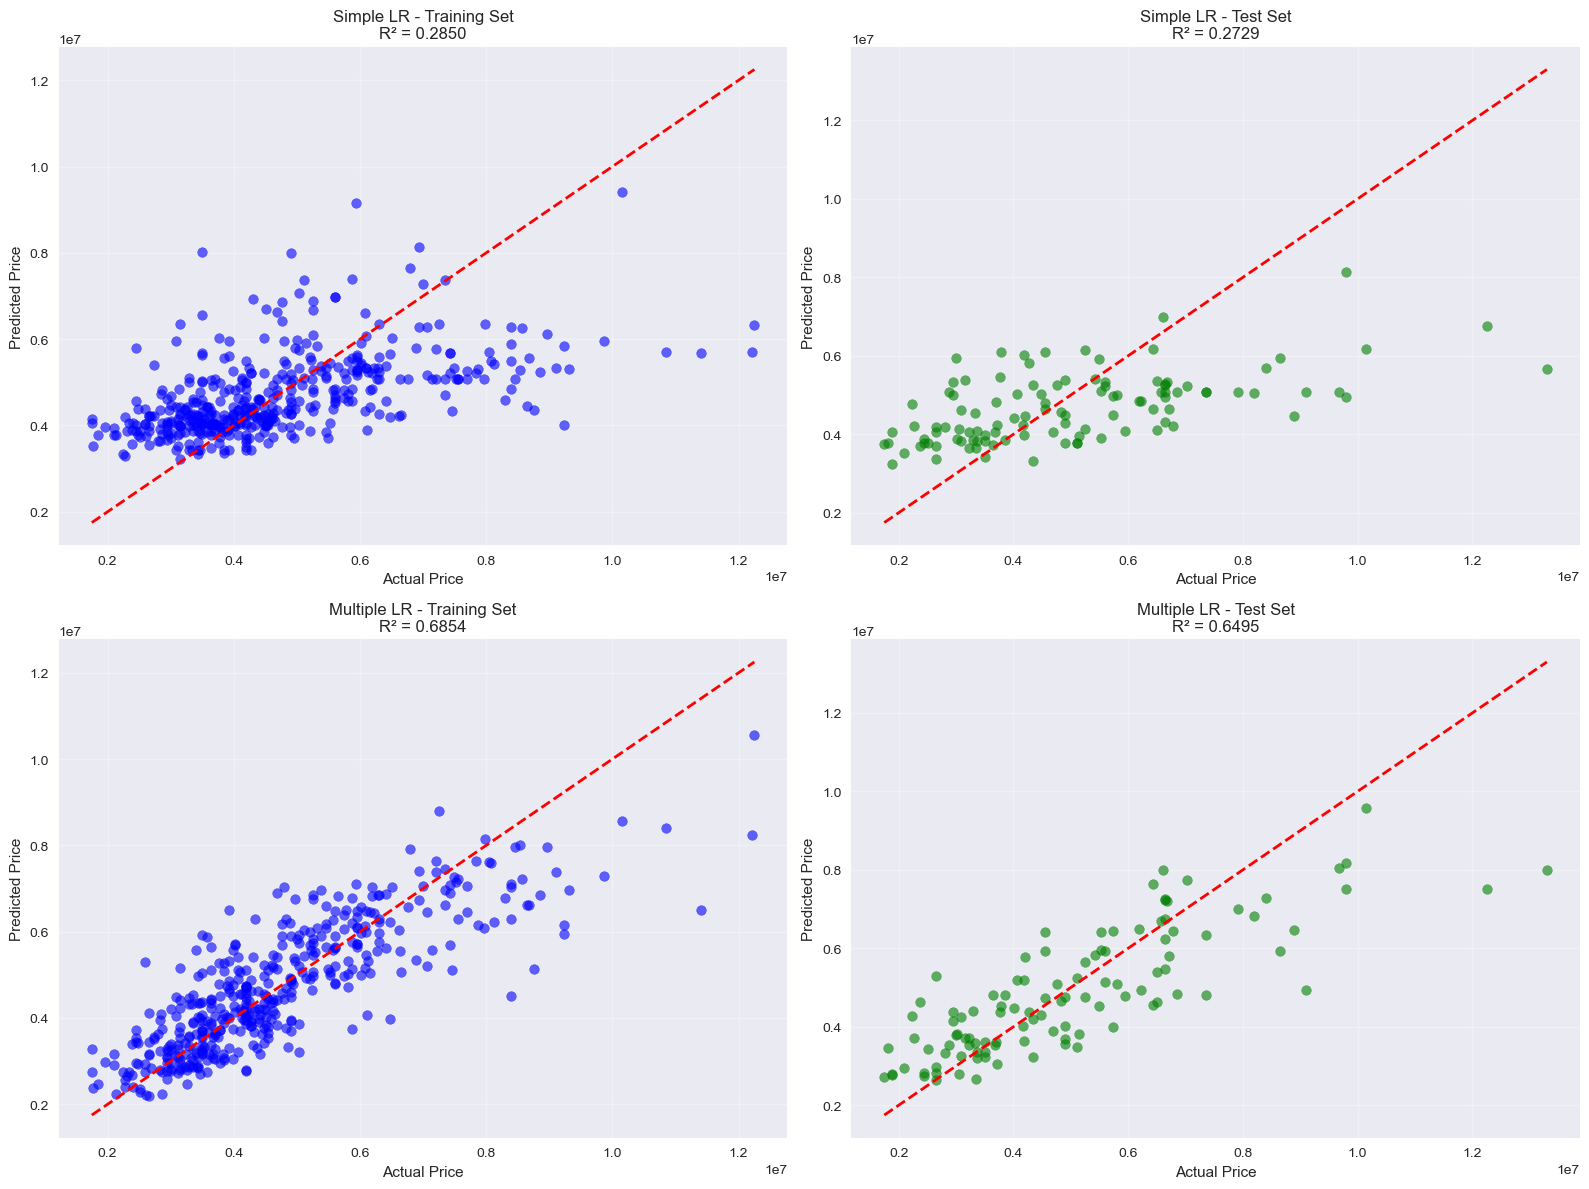

In [35]:
# Actual vs Predicted Plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Simple Linear Regression - Training
axes[0, 0].scatter(y_train, y_simple_train_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')
axes[0, 0].set_title(f'Simple LR - Training Set\nR² = {simple_train_metrics["R2"]:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# Simple Linear Regression - Testing
axes[0, 1].scatter(y_test, y_simple_test_pred, alpha=0.6, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Predicted Price')
axes[0, 1].set_title(f'Simple LR - Test Set\nR² = {simple_test_metrics["R2"]:.4f}')
axes[0, 1].grid(True, alpha=0.3)

# Multiple Linear Regression - Training
axes[1, 0].scatter(y_train, y_multiple_train_pred, alpha=0.6, color='blue')
axes[1, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Price')
axes[1, 0].set_ylabel('Predicted Price')
axes[1, 0].set_title(f'Multiple LR - Training Set\nR² = {multiple_train_metrics["R2"]:.4f}')
axes[1, 0].grid(True, alpha=0.3)

# Multiple Linear Regression - Testing
axes[1, 1].scatter(y_test, y_multiple_test_pred, alpha=0.6, color='green')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Price')
axes[1, 1].set_ylabel('Predicted Price')
axes[1, 1].set_title(f'Multiple LR - Test Set\nR² = {multiple_test_metrics["R2"]:.4f}')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/05_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

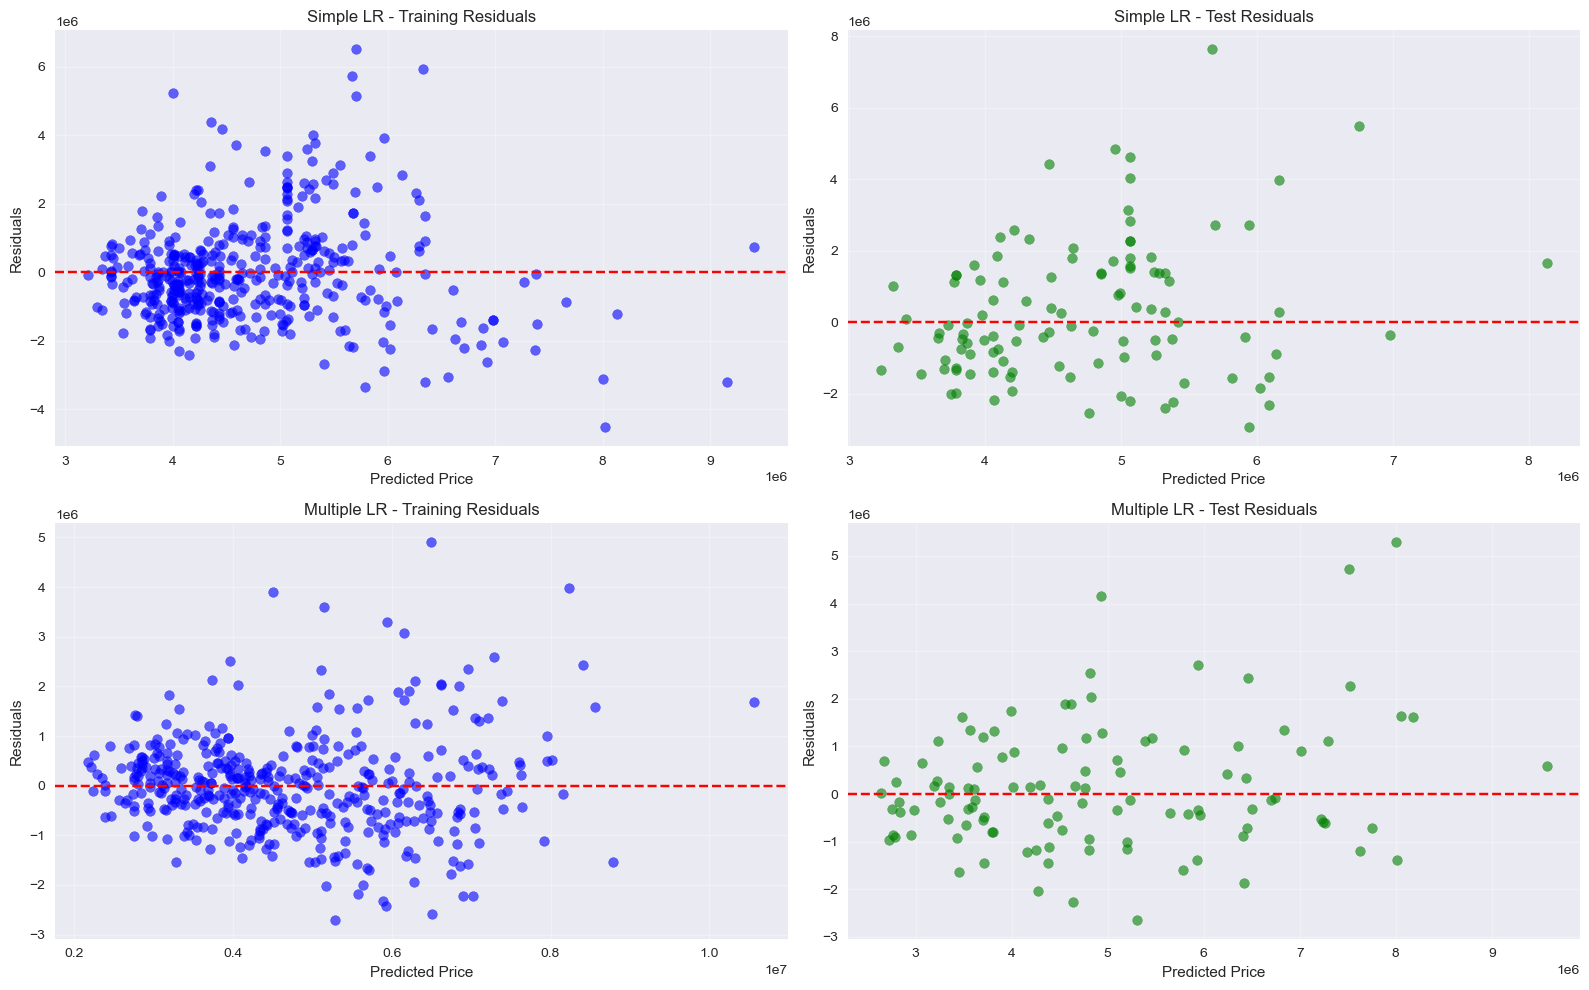

🔍 Residual Analysis:
Simple LR - Mean residual (train): -0.00
Simple LR - Std residual (train): 1486541.98
Multiple LR - Mean residual (train): -0.00
Multiple LR - Std residual (train): 985967.79


In [36]:
# Residual Plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Calculate residuals
simple_train_residuals = y_train - y_simple_train_pred
simple_test_residuals = y_test - y_simple_test_pred
multiple_train_residuals = y_train - y_multiple_train_pred
multiple_test_residuals = y_test - y_multiple_test_pred

# Simple LR - Training residuals
axes[0, 0].scatter(y_simple_train_pred, simple_train_residuals, alpha=0.6, color='blue')
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Predicted Price')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Simple LR - Training Residuals')
axes[0, 0].grid(True, alpha=0.3)

# Simple LR - Test residuals
axes[0, 1].scatter(y_simple_test_pred, simple_test_residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Predicted Price')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Simple LR - Test Residuals')
axes[0, 1].grid(True, alpha=0.3)

# Multiple LR - Training residuals
axes[1, 0].scatter(y_multiple_train_pred, multiple_train_residuals, alpha=0.6, color='blue')
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Predicted Price')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Multiple LR - Training Residuals')
axes[1, 0].grid(True, alpha=0.3)

# Multiple LR - Test residuals
axes[1, 1].scatter(y_multiple_test_pred, multiple_test_residuals, alpha=0.6, color='green')
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Predicted Price')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Multiple LR - Test Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/06_residual_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Residual Analysis
print("🔍 Residual Analysis:")
print(f"Simple LR - Mean residual (train): {simple_train_residuals.mean():.2f}")
print(f"Simple LR - Std residual (train): {simple_train_residuals.std():.2f}")
print(f"Multiple LR - Mean residual (train): {multiple_train_residuals.mean():.2f}")
print(f"Multiple LR - Std residual (train): {multiple_train_residuals.std():.2f}")

### 10. Coefficient Analysis and Interpretation

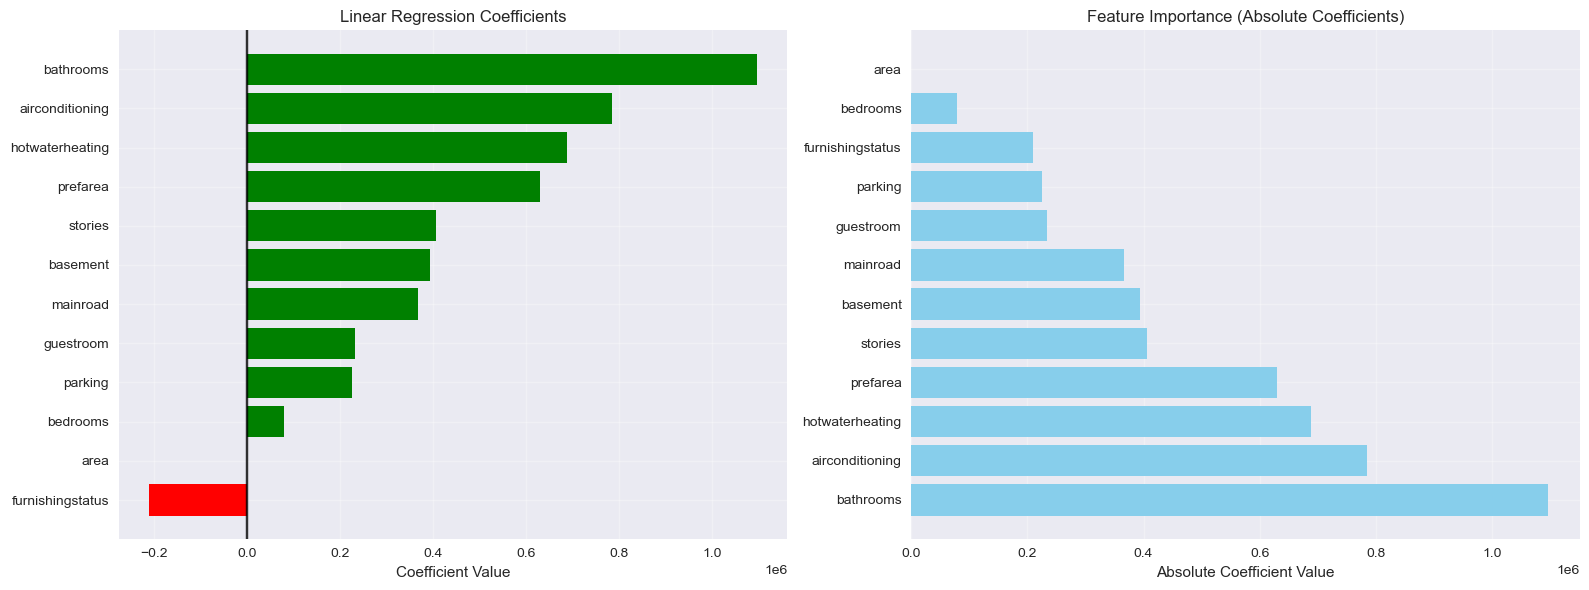

🔍 DETAILED COEFFICIENT INTERPRETATION
Intercept: ₹293083.07
This represents the base price when all features are zero.

📊 COEFFICIENT ANALYSIS:
----------------------------------------------------------------------
📈 bathrooms           : increases price by ₹1,097,117.27 per unit
📈 airconditioning     : increases price by ₹785,550.58 per unit
📈 hotwaterheating     : increases price by ₹687,881.31 per unit
📈 prefarea            : increases price by ₹629,901.66 per unit
📈 stories             : increases price by ₹406,223.16 per unit
📈 basement            : increases price by ₹393,159.78 per unit
📈 mainroad            : increases price by ₹366,824.19 per unit
📈 guestroom           : increases price by ₹233,146.77 per unit
📈 parking             : increases price by ₹225,756.51 per unit
📉 furnishingstatus    : decreases price by ₹210,397.12 per unit
📈 bedrooms            : increases price by ₹78,574.49 per unit
📈 area                : increases price by ₹235.85 per unit

🎯 KEY INSIGHTS:
• M

In [37]:
# Coefficient Analysis and Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Coefficient values
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': multiple_lr.coef_
}).sort_values('Coefficient', ascending=True)

axes[0].barh(coefficients_df['Feature'], coefficients_df['Coefficient'], 
             color=['red' if x < 0 else 'green' for x in coefficients_df['Coefficient']])
axes[0].set_xlabel('Coefficient Value')
axes[0].set_title('Linear Regression Coefficients')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=0, color='black', linestyle='-', alpha=0.8)

# Plot 2: Absolute coefficient values (feature importance)
abs_coefficients_df = feature_importance.copy()
axes[1].barh(abs_coefficients_df['Feature'], abs_coefficients_df['Abs_Coefficient'], color='skyblue')
axes[1].set_xlabel('Absolute Coefficient Value')
axes[1].set_title('Feature Importance (Absolute Coefficients)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/07_coefficient_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Detailed coefficient interpretation
print("🔍 DETAILED COEFFICIENT INTERPRETATION")
print("=" * 70)
print(f"Intercept: ₹{multiple_lr.intercept_:.2f}")
print("This represents the base price when all features are zero.\n")

print("📊 COEFFICIENT ANALYSIS:")
print("-" * 70)

for _, row in feature_importance.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    abs_coef = row['Abs_Coefficient']
    
    if coef > 0:
        direction = "increases"
        emoji = "📈"
    else:
        direction = "decreases"
        emoji = "📉"
    
    print(f"{emoji} {feature:<20}: {direction} price by ₹{abs_coef:,.2f} per unit")

print(f"\n🎯 KEY INSIGHTS:")
print(f"• Most influential feature: {feature_importance.iloc[0]['Feature']} (₹{feature_importance.iloc[0]['Abs_Coefficient']:,.2f} impact per unit)")
print(f"• Least influential feature: {feature_importance.iloc[-1]['Feature']} (₹{feature_importance.iloc[-1]['Abs_Coefficient']:,.2f} impact per unit)")

# Positive vs Negative impact features
positive_features = feature_importance[feature_importance['Coefficient'] > 0]['Feature'].tolist()
negative_features = feature_importance[feature_importance['Coefficient'] < 0]['Feature'].tolist()

print(f"\n📈 Features that INCREASE price: {positive_features}")
print(f"📉 Features that DECREASE price: {negative_features}")

## 📁 Saved Visualizations

All visualizations have been saved to the `images/` folder as high-resolution PNG files:

1. **01_price_distribution.png** - Distribution, box plot, and Q-Q plot of house prices
2. **02_correlation_heatmap.png** - Correlation matrix heatmap of all features
3. **03_scatter_plots.png** - Scatter plots showing relationships between key features and price
4. **04_simple_regression_line.png** - Simple linear regression visualization with regression line
5. **05_actual_vs_predicted.png** - Actual vs predicted values for both models
6. **06_residual_plots.png** - Residual analysis plots for model validation
7. **07_coefficient_analysis.png** - Feature importance and coefficient visualization

These high-quality images can be used for presentations, reports, or further analysis.